In [24]:
import os
from pathlib import Path
import glob

import pandas as pd
import numpy as np
from uncertainties import ufloat, unumpy

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context('talk')

In [25]:
# https://stackoverflow.com/questions/22348756/upright-mu-in-plot-label-retaining-original-tick-fonts
# https://stackoverflow.com/questions/2537868/sans-serif-math-with-latex-in-matplotlib

import matplotlib
from matplotlib import rc

## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})

#params = {'text.latex.preamble':[r'\usepackage{siunitx}',
#                                 r'\usepackage{amsmath}',
#                                 r'\usepackage{physics}',
#                                 r'\usepackage{sfmath}',
#                                 r'\sisetup{detect-all=true}']}

params = {'text.usetex':True,
          'font.family':'serif',
          'font.sans-serif':'cm',
          'text.latex.preamble':[r'\usepackage{siunitx}',
                                 r'\usepackage{amsmath}',
                                 r'\usepackage{physics}',
                                 r'\usepackage{mathptmx}',
                                 r'\sisetup{detect-all=true}',
                                 r'\DeclareSIUnit\inch{in}',
                                 r'\DeclareSIUnit\gauss{G}'],
          'mathtext.fontset':'cm'}
plt.rcParams.update(params)

## Read in compiled data

In [26]:
# Navigation relative to phd_thesis directory since the strontium Rydberg lines data is in another folder
ROOT_DIR = Path.cwd().parents[3]

DATA_DIR = ROOT_DIR.joinpath('appendices', 'sr_data', 'rydberg_lines')

In [27]:
# Read in compiled data
DIRECTORIES = [os.path.join(DATA_DIR, 'Beigang1982.OC.42.19', 'Beigang1982.OC.42.19-analyzed.csv'),
               os.path.join(DATA_DIR, 'Beigang1982.PS.26.183', 'Beigang1982.PS.26.183-analyzed.csv'),
               os.path.join(DATA_DIR, 'Couturier2019.PRA.99.022503', 'Couturier2019.PRA.99.022503-analyzed.csv'),
               os.path.join(DATA_DIR, 'Esherick1977.PRA.15.1920', 'Esherick1977.PRA.15.1920-analyzed.csv'),
               os.path.join(DATA_DIR ,'Armstrong1979.JOSA.69.211', 'Armstrong1979.JOSA.69.211-analyzed.csv'),
               os.path.join(DATA_DIR, 'Jackson2018.PhD', 'Jackson2018.PhD-analyzed.csv'),
               os.path.join(DATA_DIR, 'Philip2007.OC.279.141', 'Philip2007.OC.279.141-analyzed.csv'),
               os.path.join(DATA_DIR, 'Kunze1993.ZPD.27.111', 'Kunze1993.ZPD.27.111-analyzed.csv'),
               os.path.join(DATA_DIR, 'Dai1995.PRA.52.4416', 'Dai1995.PRA.52.4416-analyzed.csv'),
               os.path.join(DATA_DIR, 'Dai1995.JQSRT.54.1019', 'Dai1995.JQSRT.54.1019-analyzed.csv'),
               os.path.join(DATA_DIR, 'Ding2018.PRA.98.042505', 'Ding2018.PRA.98.042505-analyzed.csv')]

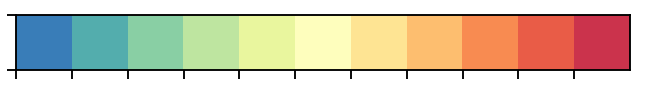

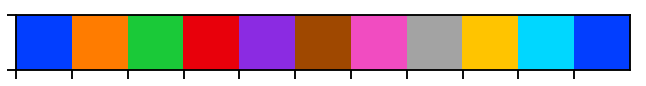

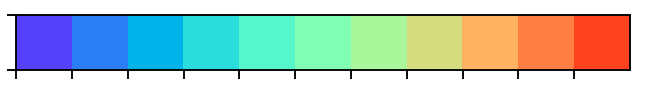

In [28]:
sns.palplot(sns.color_palette('Spectral_r', n_colors=len(DIRECTORIES)))
sns.palplot(sns.color_palette('bright', n_colors=len(DIRECTORIES)))
sns.palplot(sns.color_palette('rainbow', n_colors=len(DIRECTORIES)))

In [31]:
# Goes through all listed .csv files and returns data in a single DataFrame

file_list = DIRECTORIES

def gather_data_csv(file_list):
    
    # Read in .csv files in to single DataFrame
    out = pd.DataFrame()
    
    for file_name in file_list:
        df = pd.read_csv(file_name)
        
        out = pd.concat([out, df], join='outer', ignore_index=True, sort=False)
    
    return out

out = gather_data_csv(file_list)

# Add plotting properties to DF
#cpal = sns.color_palette('winter', n_colors=len(DIRECTORIES))
cpal = sns.color_palette('rainbow', n_colors=len(DIRECTORIES))

out['marker'] = 'x'
out['markerfacecolor'] = 'black'
out['markeredgecolor'] = 'black'
out['zorder'] = 0
for idx, row in out.iterrows():
    
    # (1) Esherick1977.PRA.15.1920: 1977/05/01
    if row['Reference'] == 'Esherick1977.PRA.15.1920':
        edge_color = cpal[0]
        fill_color = edge_color
        marker = '.'
        z_order = 1
    
    # (2) Armstrong1979.JOSA.69.211: 1979/07/13
    elif row['Reference'] == 'Armstrong1979.JOSA.69.211':
        edge_color = cpal[1]
        fill_color = edge_color
        marker = '.'
        z_order = 2
    
    # (3) Beigang1982.OC.42.19: 1982/02/08
    elif row['Reference'] == 'Beigang1982.OC.42.19':
        edge_color = cpal[2]
        fill_color = edge_color
        marker = '.'
        z_order = 3
    
    # (4) Beigang1982.PS.26.183: 1982/04/16
    elif row['Reference'] == 'Beigang1982.PS.26.183':
        edge_color = tuple(cpal[3])
        fill_color = edge_color
        marker = '.'
        z_order = 4
    
    # (5) Kunze1993.ZPD.27.111: 1993/01/08
    elif row['Reference'] == 'Kunze1993.ZPD.27.111':
        edge_color = tuple(cpal[4])
        fill_color = edge_color
        marker = '.'
        z_order = 5
    
    # (6) Dai1995.JQSRT.54.1019: 1995/01/03
    elif row['Reference'] == 'Dai1995.JQSRT.54.1019':
        edge_color = cpal[5]
        fill_color = edge_color
        marker = '.'
        z_order = 6
    
    # (7) Dai1995.PRA.52.4416: 1995/12/01
    elif row['Reference'] == 'Dai1995.PRA.52.4416':
        edge_color = tuple(cpal[6])
        fill_color = edge_color
        marker = '.'
        z_order = 7
    
    # (8) Philip2007.OC.279.141: 2007/03/28
    elif row['Reference'] == 'Philip2007.OC.279.141':
        edge_color = tuple(cpal[7])
        fill_color = edge_color
        marker = '.'
        z_order = 8
    
    # (9) Jackson2018.PhD: 2018/10/10
    elif row['Reference'] == 'Jackson2018.PhD':
        edge_color = cpal[8]
        fill_color = edge_color
        marker = '.'
        z_order = 9
    
    # (11) Couturier2019.PRA.99.022503: 2019/02/04
    elif row['Reference'] == 'Couturier2019.PRA.99.022503':
        edge_color = cpal[10]
        fill_color = edge_color
        marker = '.'
        z_order = 11
    
    # (10) Ding2018.PRA.98.042505: 2018/10/12
    elif row['Reference'] == 'Ding2018.PRA.98.042505':
        edge_color = cpal[9]
        fill_color = edge_color
        marker = '.'
        z_order = len(DIRECTORIES)+1
    
    else:
        print('Unknown reference')
    
    out.at[idx, 'marker'] = marker
    out.at[idx, 'markeredgecolor'] = edge_color
    out.at[idx, 'markerfacecolor'] = fill_color
    out.at[idx, 'zorder'] = z_order

## Plotting

5sns_1S0.pgf


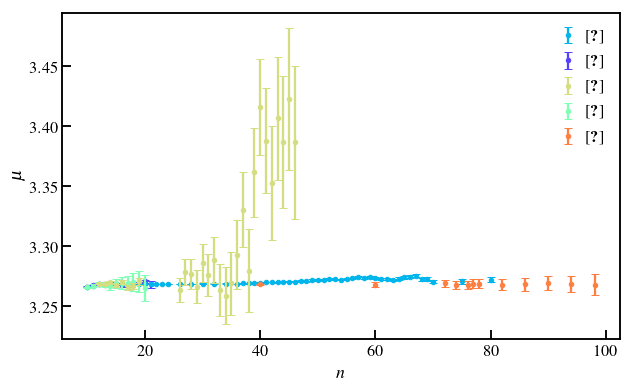

5sns_3S1.pgf


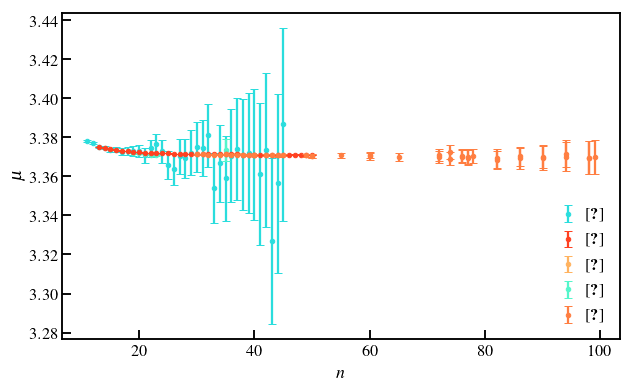

5snd_1D2.pgf


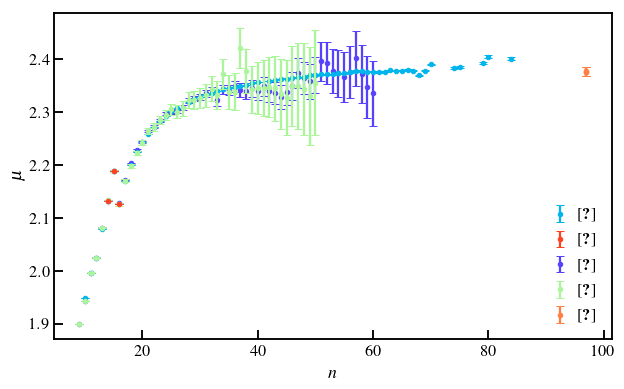

5snd_3D1.pgf


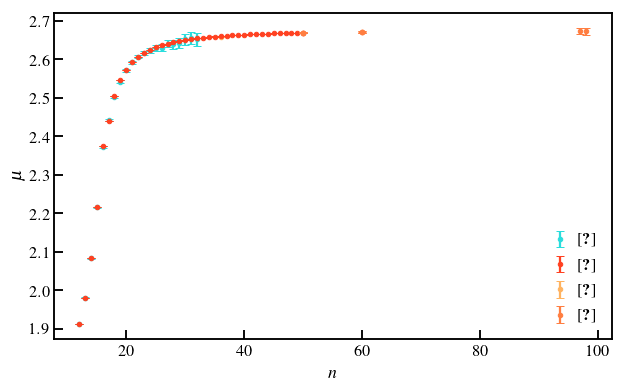

5snd_3D2.pgf


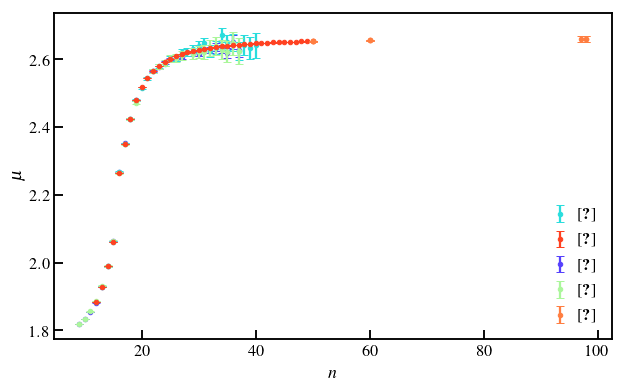

5snd_3D3.pgf


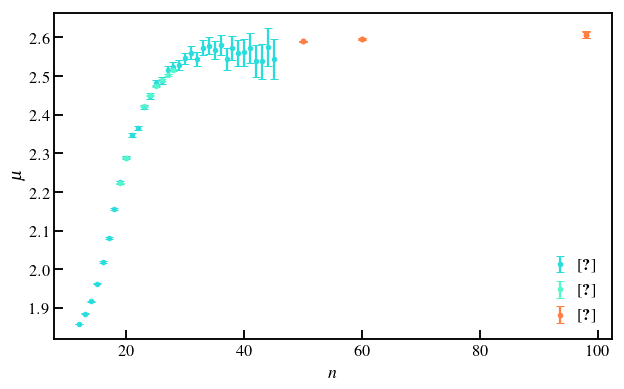

In [32]:
# [[Series, Term]]
data_to_plot = [['5sns', '1S0'],
                ['5sns', '3S1'],
                ['5snd', '1D2'],
                ['5snd', '3D1'],
                ['5snd', '3D2'],
                ['5snd', '3D3']]

#plt_kwargs = {'capsize':4,'fmt':'.'}

nrows = len(data_to_plot)

if nrows > 1:
    
    # S = Series, T = Term
    for i, [S, T] in enumerate(data_to_plot):
        
        fig = plt.figure(figsize=(10,6))
        ax = plt.gca()
        
        fig_name = S + '_' + T + '.pgf'
        
        for r in list(out[out['Term'] == T]['Reference'].unique()):
            
            label_str = r'\cite{' + r + r'}'
            
            x = out[(out['Series'] == S) & (out['Term'] == T) & (out['Reference'] == r)]['n']
            y = out[(out['Series'] == S) & (out['Term'] == T) & (out['Reference'] == r)]['delta_exp']
            yerr = out[(out['Series'] == S) & (out['Term'] == T) & (out['Reference'] == r)]['delta_exp_unc']
            
            # Plotting options from DataFrame
            mk = out[(out['Series'] == S) & (out['Term'] == T) & (out['Reference'] == r)]['marker'].unique()[0]
            mec = out[(out['Series'] == S) & (out['Term'] == T) & (out['Reference'] == r)]['markeredgecolor'].unique()[0]
            mfc = out[(out['Series'] == S) & (out['Term'] == T) & (out['Reference'] == r)]['markerfacecolor'].unique()[0]
            zo = out[(out['Series'] == S) & (out['Term'] == T) & (out['Reference'] == r)]['zorder'].unique()[0]
            
            plt.errorbar(x, y, yerr=yerr, label=label_str, fmt=mk, color=mfc, capsize=4, zorder=zo)
        
        plt_title = 'PROBLEM!'
        if T == '1S0':
            plt_title = r'$(5sns){\,}{}^{1}S_{0}$'
        
        elif T == '3S1':
            plt_title = r'$(5sns){\,}^{3}S_{1}$'
        
        elif T == '1D2':
            plt_title = r'$(5snd){\,}{}^{1}D_{2}$'
        
        elif T == '3D1':
            plt_title = r'$(5snd){\,}{}^{3}D_{1}$'
        
        elif T == '3D2':
            plt_title = r'$(5snd){\,}{}^{3}D_{2}$'
        
        elif T == '3D3':
            plt_title = r'$(5snd){\,}{}^{3}D_{3}$'
        
        else:
            plt_title = 'PROBLEM!'
        
        if T == '1S0':
            plt.legend(frameon=False, handletextpad=0.1, loc='upper right')
        else:
            plt.legend(frameon=False, handletextpad=0.1, loc='lower right')
        ax.tick_params(axis='both', direction='in')
        #ax.set_title(plt_title)
        
        plt.xlabel(r'$n$')
        plt.ylabel(r'$\mu$')
        
        print(fig_name)
    
        plt.savefig(fig_name, bbox_inches='tight')
        
        plt.show()

# Old code below

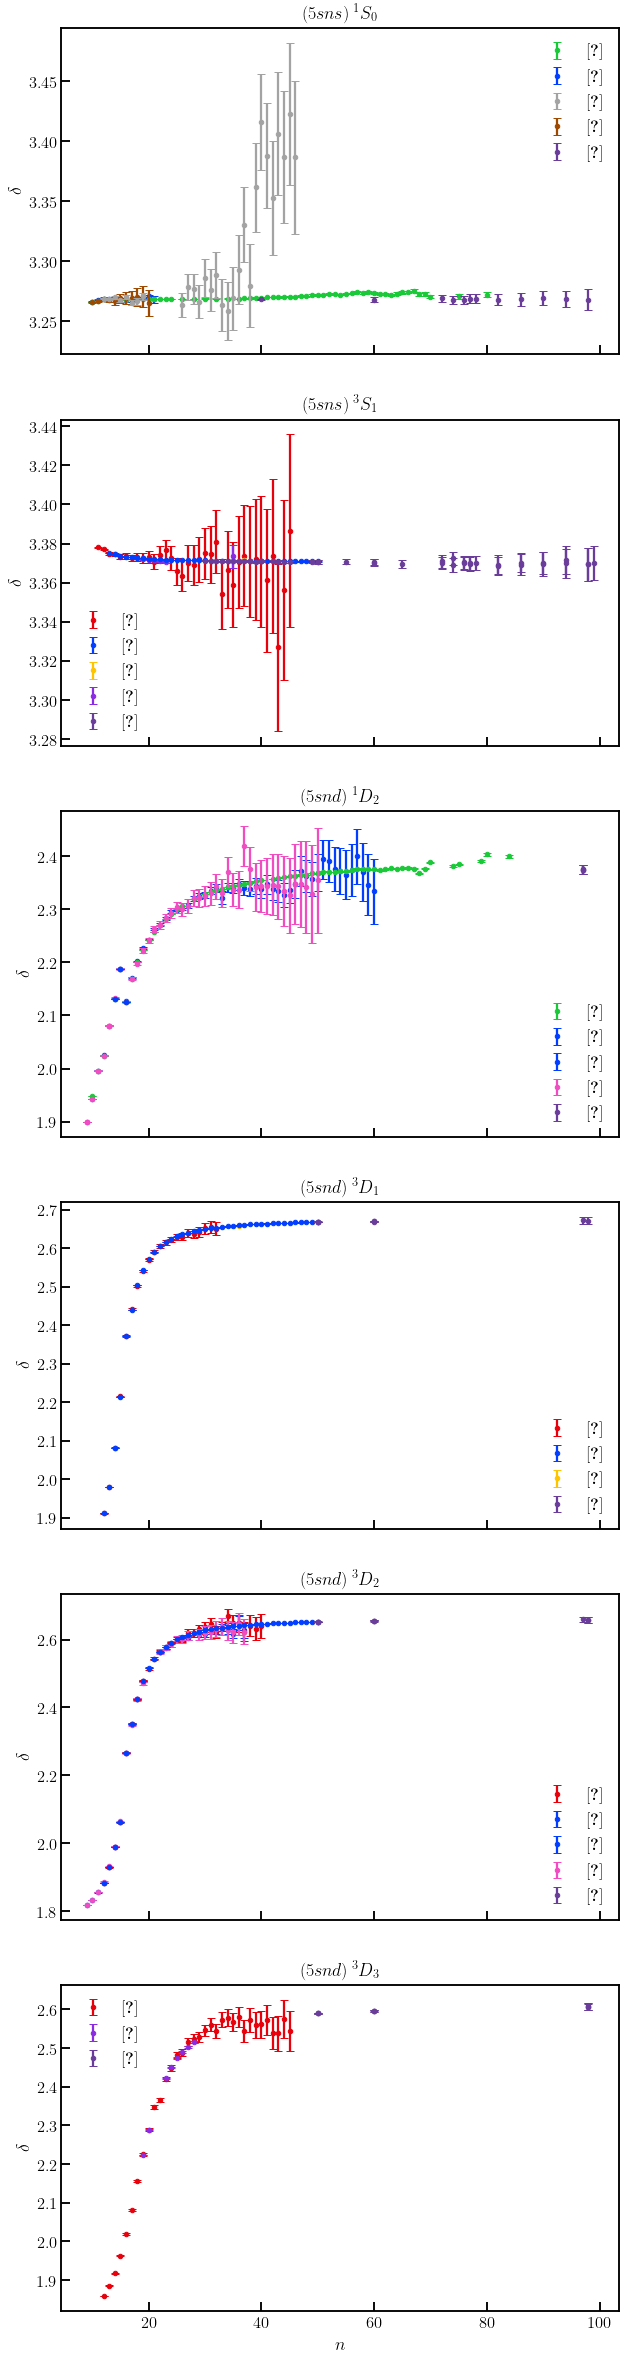

In [8]:
# [[Series, Term]]
data_to_plot = [['5sns', '1S0'],
                ['5sns', '3S1'],
                ['5snd', '1D2'],
                ['5snd', '3D1'],
                ['5snd', '3D2'],
                ['5snd', '3D3']]

#plt_kwargs = {'capsize':4,'fmt':'.'}

nrows = len(data_to_plot)

if nrows > 1:
    [fig, axs] = plt.subplots(nrows=nrows, ncols=1, figsize=(10,7*nrows), sharex=True, sharey=False)
    
    # S = Series, T = Term
    for i, [S, T] in enumerate(data_to_plot):
        
        for r in list(out[out['Term'] == T]['Reference'].unique()):
            
            label_str = r'\cite{' + r + r'}'
            
            x = out[(out['Series'] == S) & (out['Term'] == T) & (out['Reference'] == r)]['n']
            y = out[(out['Series'] == S) & (out['Term'] == T) & (out['Reference'] == r)]['delta_exp']
            yerr = out[(out['Series'] == S) & (out['Term'] == T) & (out['Reference'] == r)]['delta_exp_unc']
            
            # Plotting options from DataFrame
            mk = out[(out['Series'] == S) & (out['Term'] == T) & (out['Reference'] == r)]['marker'].unique()[0]
            mec = out[(out['Series'] == S) & (out['Term'] == T) & (out['Reference'] == r)]['markeredgecolor'].unique()[0]
            mfc = out[(out['Series'] == S) & (out['Term'] == T) & (out['Reference'] == r)]['markerfacecolor'].unique()[0]
            zo = out[(out['Series'] == S) & (out['Term'] == T) & (out['Reference'] == r)]['zorder'].unique()[0]
            
            axs[i].errorbar(x, y, yerr=yerr, label=label_str, fmt=mk, color=mfc, capsize=4, zorder=zo)
        
        plt_title = 'PROBLEM!'
        if T == '1S0':
            plt_title = r'$(5sns){\,}{}^{1}S_{0}$'
        
        elif T == '3S1':
            plt_title = r'$(5sns){\,}^{3}S_{1}$'
        
        elif T == '1D2':
            plt_title = r'$(5snd){\,}{}^{1}D_{2}$'
        
        elif T == '3D1':
            plt_title = r'$(5snd){\,}{}^{3}D_{1}$'
        
        elif T == '3D2':
            plt_title = r'$(5snd){\,}{}^{3}D_{2}$'
        
        elif T == '3D3':
            plt_title = r'$(5snd){\,}{}^{3}D_{3}$'
        
        else:
            plt_title = 'PROBLEM!'
        
        axs[i].legend(frameon=False)
        axs[i].tick_params(axis='both', direction='in')
        axs[i].set_ylabel(r'$\delta$')
        axs[i].set_title(plt_title)
    
    plt.xlabel(r'$n$')
    
    #plt.savefig('test.pgf', bbox_inches='tight')
    
    plt.show()